In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
x = df.drop('species',axis=1)
y = df['species']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import BaggingClassifier
# In BaggingClassifier, we can use any base estimator. By default, it uses DecisionTreeClassifier as base estimator.

In [42]:
model = BaggingClassifier()

In [43]:
model.fit(x_train, y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [44]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 100.0 %


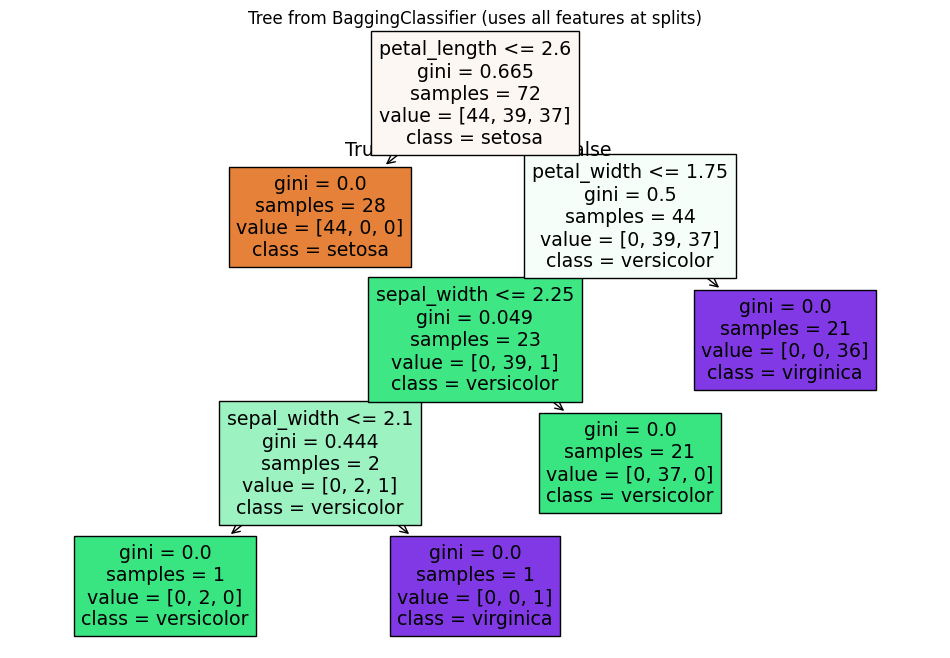

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(model.estimators_[0], filled=True, feature_names=df.columns[:-1], class_names=df['species'].unique())
plt.title("Tree from BaggingClassifier (uses all features at splits)")
plt.show()
